# <center> 
# <center> 1. ACF and PACF
## <center> ECO374

Load Python packages

In [1]:
pth_packages = ['yfinance']
import subprocess, sys
for pkg in pth_packages: subprocess.run([sys.executable, '-m', 'pip', 'install', pkg, '--quiet'], check=True)
import numpy as np, pandas as pd, yfinance as yf, datetime as dt
import statsmodels.api as sm, matplotlib.pyplot as plt, matplotlib.dates as mdates
import warnings; warnings.simplefilter('ignore', category=UserWarning)
from statsmodels.tools.sm_exceptions import InterpolationWarning
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Data

Load financial data on Google (Alphabet) stock price ([Source](https://finance.yahoo.com/quote/GOOG/)).

In [2]:
GOOG = yf.download('GOOG', start='2007-01-01', progress=False, auto_adjust=False)

Extract close price

In [3]:
Google_close = GOOG['Close']

Difference the series

In [4]:
Dif_Google_close = Google_close.diff().dropna()

Plot the data

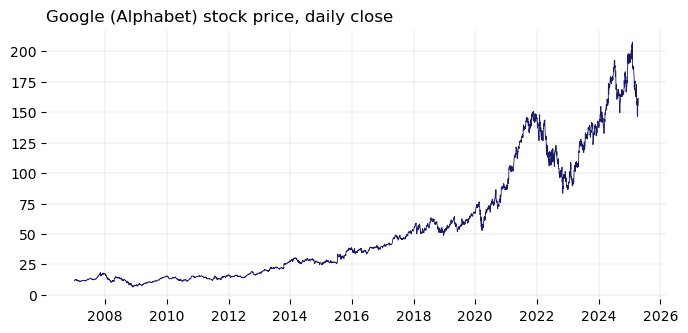

In [5]:
plt.figure(figsize=(8, 3.5))
plt.plot(Google_close, '-', color='midnightblue', linewidth=0.6)
plt.title('Google (Alphabet) stock price, daily close', loc='left')
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.box(False)
plt.show()

Plot the differenced data

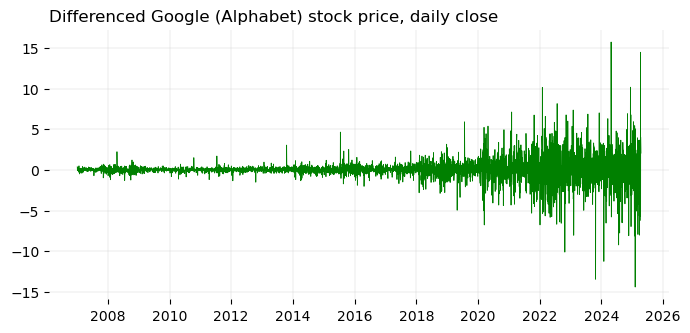

In [6]:
plt.figure(figsize=(8, 3.5))
plt.plot(Dif_Google_close, '-', color='green', linewidth=0.6)
plt.title('Differenced Google (Alphabet) stock price, daily close', loc='left')
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.box(False)
plt.show()

# 2. Stationarity Test

The KPSS test, H0: time series is stationary, H1: time series is non-stationary 

In [7]:
kpss_test = sm.tsa.stattools.kpss(Google_close)
print("KPSS Stationarity Test:")
print("p-value:", kpss_test[1])

KPSS Stationarity Test:
p-value: 0.01


The p-value is smaller than 0.05, therefore we reject the null hypothesis of stationarity and conclude that the series is non-stationary.

Differenced data: 

In [8]:
kpss_test = sm.tsa.stattools.kpss(Dif_Google_close)
print("KPSS Stationarity Test:")
print("p-value:", kpss_test[1])

KPSS Stationarity Test:
p-value: 0.1


The p-value is larger than 0.05, therefore we do not reject the null hypothesis of stationarity and conclude that the differenced series is stationary.

# 3. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

Original data

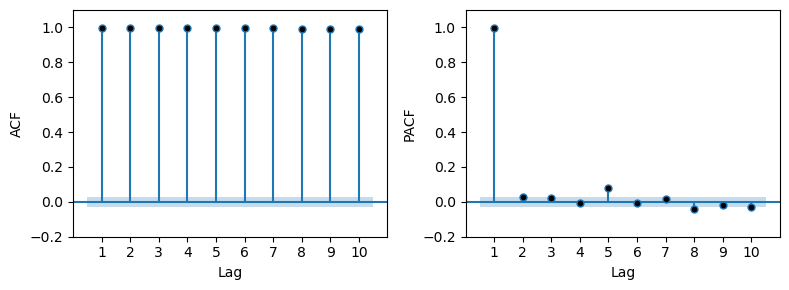

In [9]:
lag_max = 10

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs = axs.flatten()

plot_acf(Google_close, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
         bartlett_confint=False, title=None, ax=axs[0])
axs[0].set_ylabel('ACF')

plot_pacf(Google_close, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
          title=None, ax=axs[1])
axs[1].set_ylabel('PACF')

for ax in axs:
    axs[0].set_ylim(-0.2,1.1)
    axs[1].set_ylim(-0.2,1.1)
    ax.set_xticks(np.arange(1, lag_max+1, step=1))
    ax.set_xlabel('Lag')

fig.tight_layout() 
plt.show() 

Differenced data

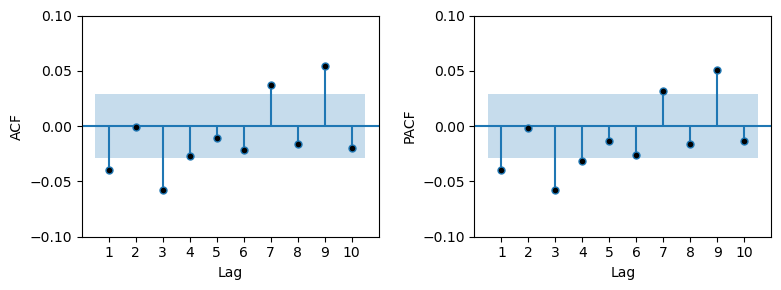

In [10]:
lag_max = 10

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs = axs.flatten()

plot_acf(Dif_Google_close, lags=lag_max, alpha=0.05, zero=False, mfc='black',
         bartlett_confint=False, title=None, ax=axs[0])
axs[0].set_ylabel('ACF')

plot_pacf(Dif_Google_close, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
          title=None, ax=axs[1])
axs[1].set_ylabel('PACF')

for ax in axs:
    axs[0].set_ylim(-0.1,0.1)
    axs[1].set_ylim(-0.1,0.1)
    ax.set_xticks(np.arange(1, lag_max+1, step=1))
    ax.set_xlabel('Lag')

fig.tight_layout() 
plt.show()